In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
hebarmans_data = pd.read_csv(".\haberman.data")

In [3]:
print(hebarmans_data.columns) # Showing thecolumn
hebarmans_data.describe() 

Index(['30', '64', '1', '1.1'], dtype='object')


,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
print(hebarmans_data.head())

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1


In [5]:
cancer_data = pd.read_csv(".\haberman.data",header=None,names=['age','year_of_operation','aux_mode_detected','survival_status'])
print(hebarmans_data.columns)
cancer_data.describe()
cancer_data.info()

Index(['30', '64', '1', '1.1'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                306 non-null    int64
 1   year_of_operation  306 non-null    int64
 2   aux_mode_detected  306 non-null    int64
 3   survival_status    306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
# modify the survival_status column value to be meaningfull as categorised

cancer_data['survival_status'] = cancer_data['survival_status'].map({1:"survived",2:"not_survived"})
cancer_data['survival_status'] = cancer_data['survival_status'].astype('category')
print(hebarmans_data.head())

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1


In [7]:
print('shape: ',cancer_data.shape)
print('column name:',cancer_data.columns)
print('unique :',cancer_data['survival_status'].unique())
print('value count:',cancer_data['survival_status'].value_counts())

shape:  (306, 4)
column name: Index(['age', 'year_of_operation', 'aux_mode_detected', 'survival_status'], dtype='object')
unique : ['survived', 'not_survived']
Categories (2, object): ['survived', 'not_survived']
value count: survived        225
not_survived     81
Name: survival_status, dtype: int64


# Histogram,PDF,CDF

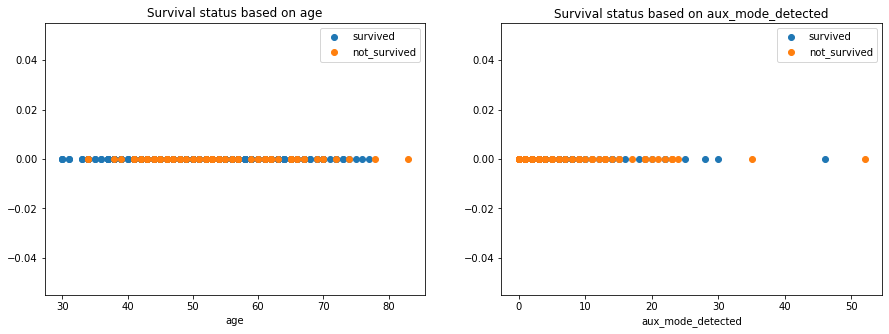

In [8]:
survived_patients =cancer_data.loc[cancer_data['survival_status']=='survived' ]
not_survived_patients =cancer_data.loc[cancer_data['survival_status']=='not_survived']
plt.figure(1,figsize=(15,5))
#hebarmans_data
plt.subplot(121)
plt.plot(survived_patients['age'],np.zeros_like(survived_patients['age']),'o',label='survived')
plt.plot(not_survived_patients['age'],np.zeros_like(not_survived_patients['age']),'o',label='not_survived')
plt.legend()
plt.xlabel('age')
plt.title('Survival status based on age')


plt.subplot(122)
plt.plot(survived_patients['aux_mode_detected'],np.zeros_like(survived_patients['aux_mode_detected']),'o',label='survived')
plt.plot(not_survived_patients['aux_mode_detected'],np.zeros_like(not_survived_patients['aux_mode_detected']),'o',label='not_survived')
plt.legend()
plt.xlabel('aux_mode_detected')
plt.title('Survival status based on aux_mode_detected')
plt.show()

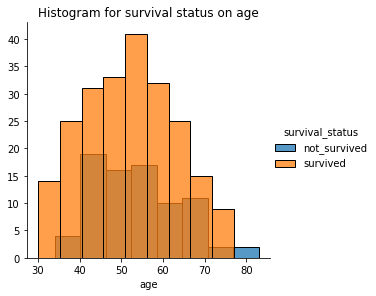

In [9]:
sns.FacetGrid(cancer_data, hue='survival_status',height=4).map(sns.histplot,'age').add_legend()
plt.title('Histogram for survival status on age')
plt.show()

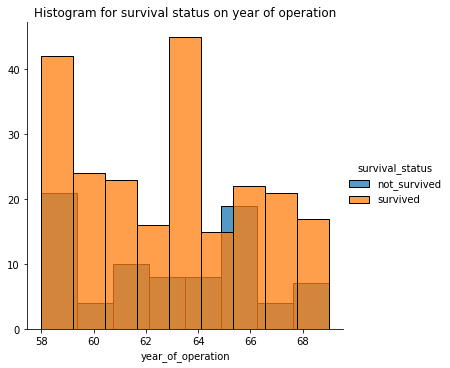

In [10]:
sns.FacetGrid(cancer_data, hue='survival_status',height=5).map(sns.histplot,'year_of_operation').add_legend()
plt.title('Histogram for survival status on year of operation')
plt.show()

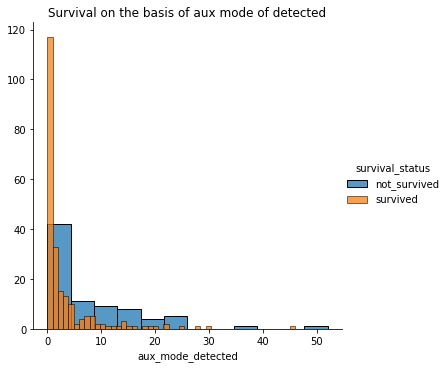

In [11]:
sns.FacetGrid(cancer_data, hue='survival_status',height=5).map(sns.histplot,'aux_mode_detected').add_legend()
plt.title('Survival on the basis of aux mode of detected')
plt.show()

------------------------------SURVIVED PATIENT------------------------------
age
Bin_Edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF:[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
CDF :[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
------------------------------NOT SURVIVED PATIENT------------------------------
age
Bin_Edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
PDF:[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
CDF :[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]
------------------------------SURVIVED PATIENT------------------------------
year_of_operation
Bin_Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF:[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.102

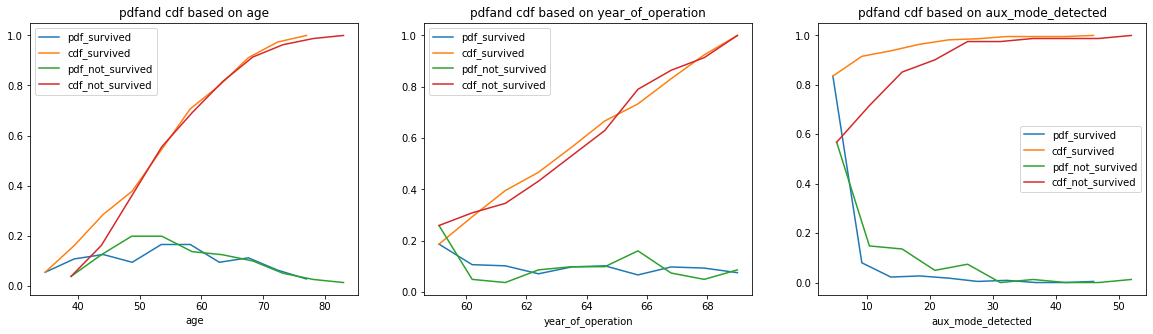

In [12]:
plt.figure(3,figsize=(20,5))
for idx, feature in enumerate(list(survived_patients.columns)[:-1]):
    plt.subplot(1,3,idx+1)
    print('-'*30+"SURVIVED PATIENT"+'-'*30)
    print(feature)
    counts, bin_edges = np.histogram(survived_patients[feature], bins=10, density=True)
    print("Bin_Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF:{}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF :{}".format(cdf))
    plt.plot(bin_edges[1:],pdf,label ='pdf_survived')
    plt.plot(bin_edges[1:],cdf,label ='cdf_survived')
    
    print('-'*30+"NOT SURVIVED PATIENT"+'-'*30)
    print(feature)
    counts, bin_edges = np.histogram(not_survived_patients[feature], bins=10, density=True)
    print("Bin_Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF:{}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF :{}".format(cdf))
    plt.plot(bin_edges[1:],pdf,label ='pdf_not_survived')
    plt.plot(bin_edges[1:],cdf,label ='cdf_not_survived')
    
    plt.title('pdfand cdf based on ' +feature)
    plt.legend()
    plt.xlabel(feature)

# BoxPlot

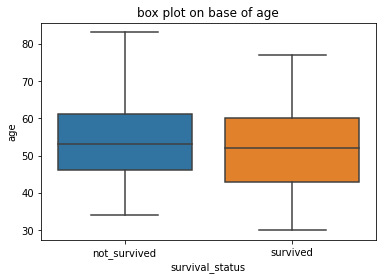

In [13]:
sns.boxplot(x='survival_status',y='age',data=cancer_data)
plt.title('box plot on base of age')
plt.show()

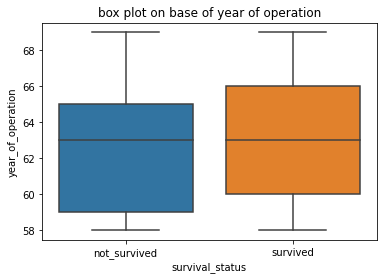

In [14]:
sns.boxplot(x='survival_status',y='year_of_operation',data=cancer_data)
plt.title('box plot on base of year of operation')
plt.show()

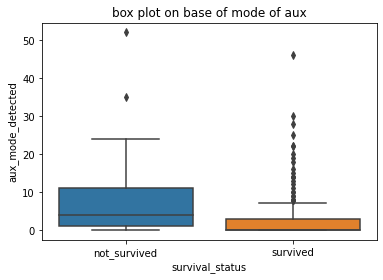

In [15]:
sns.boxplot(x='survival_status',y='aux_mode_detected',data=cancer_data)
plt.title('box plot on base of mode of aux')
plt.show()

# ViolinPlot

Text(0.5, 1.0, 'Violin plot on base of age')

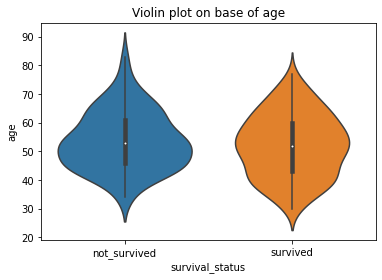

In [16]:
sns.violinplot(x='survival_status',y='age',data=cancer_data,size=5)
plt.title('Violin plot on base of age')

Text(0.5, 1.0, 'Violin plot on base of age')

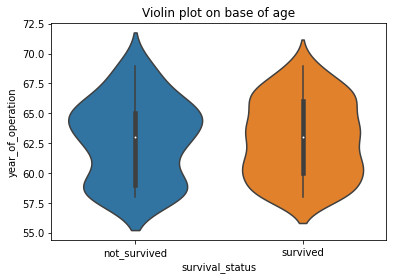

In [17]:
sns.violinplot(x='survival_status',y='year_of_operation',data=cancer_data,size=5)
plt.title('Violin plot on base of age')

Text(0.5, 1.0, 'Violin plot on base of age')

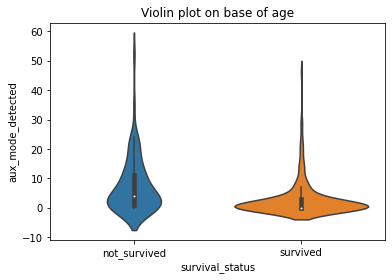

In [18]:
sns.violinplot(x='survival_status',y='aux_mode_detected',data=cancer_data,size=5)
plt.title('Violin plot on base of age')

# Multivariate & Bivariate Analysis

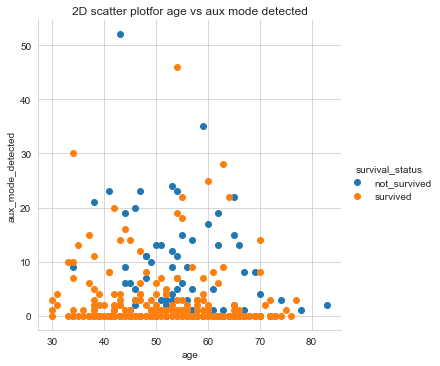

In [19]:
sns.set_style('whitegrid')
sns.FacetGrid(cancer_data,hue='survival_status',height=5).map(plt.scatter,'age','aux_mode_detected').add_legend()
plt.title('2D scatter plotfor age vs aux mode detected')
plt.show()

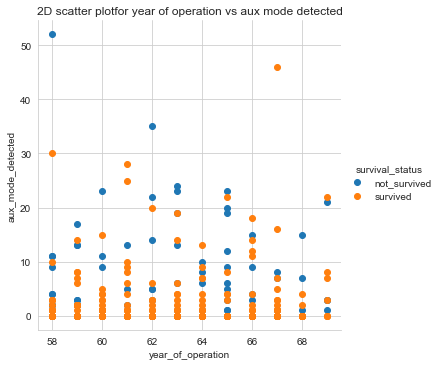

In [20]:
sns.set_style('whitegrid')
sns.FacetGrid(cancer_data,hue='survival_status',height=5).map(plt.scatter,'year_of_operation','aux_mode_detected').add_legend()
plt.title('2D scatter plotfor year of operation vs aux mode detected')
plt.show()

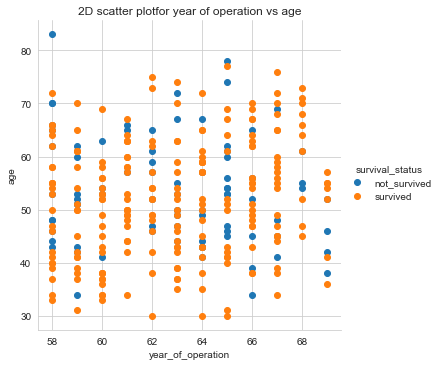

In [21]:
sns.set_style('whitegrid')
sns.FacetGrid(cancer_data,hue='survival_status',height=5).map(plt.scatter,'year_of_operation','age').add_legend()
plt.title('2D scatter plotfor year of operation vs age')
plt.show()

# Pair plot

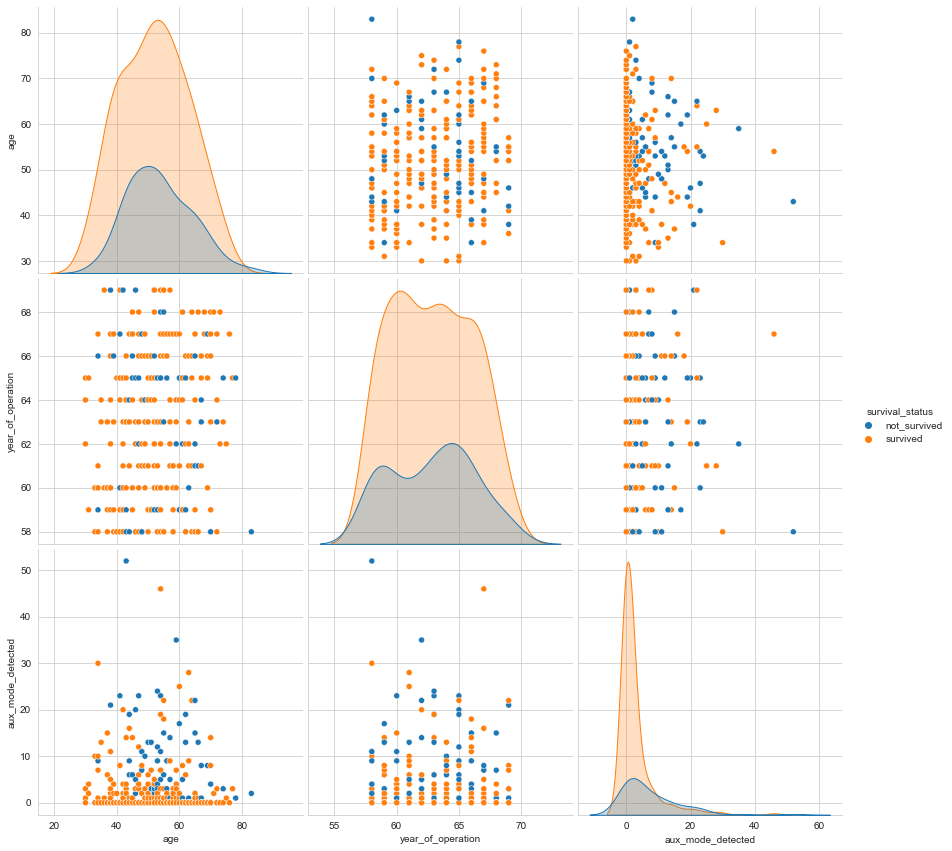

In [22]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(cancer_data, hue='survival_status',vars=['age','year_of_operation','aux_mode_detected'],height=4)
plt.show()

# Probability Density, contour plot

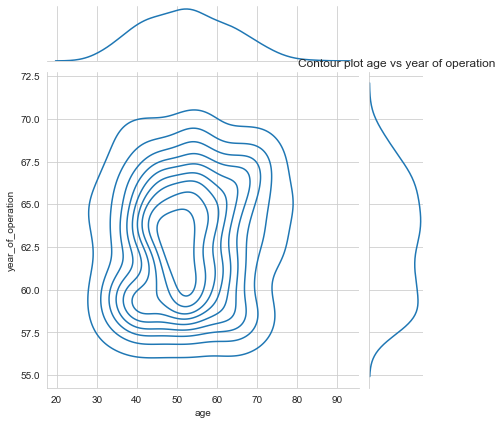

In [23]:
sns.jointplot(x='age',y='year_of_operation',data=cancer_data,kind='kde')
plt.title('Contour plot age vs year of operation')
plt.show()